# Multiple Linear Regression
## Suryakumar P 21MIS1146

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# read the dataset 
students_data = pd.read_csv("Student_Performance.csv")

In [3]:
# check the lenght of dataset 
len(students_data)

10000

In [4]:
students_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# check for missing values
students_data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
#get info of the dataset 
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
# import the visualizations library
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [10]:
# to remove the warning message 
import warnings
warnings.filterwarnings('ignore')

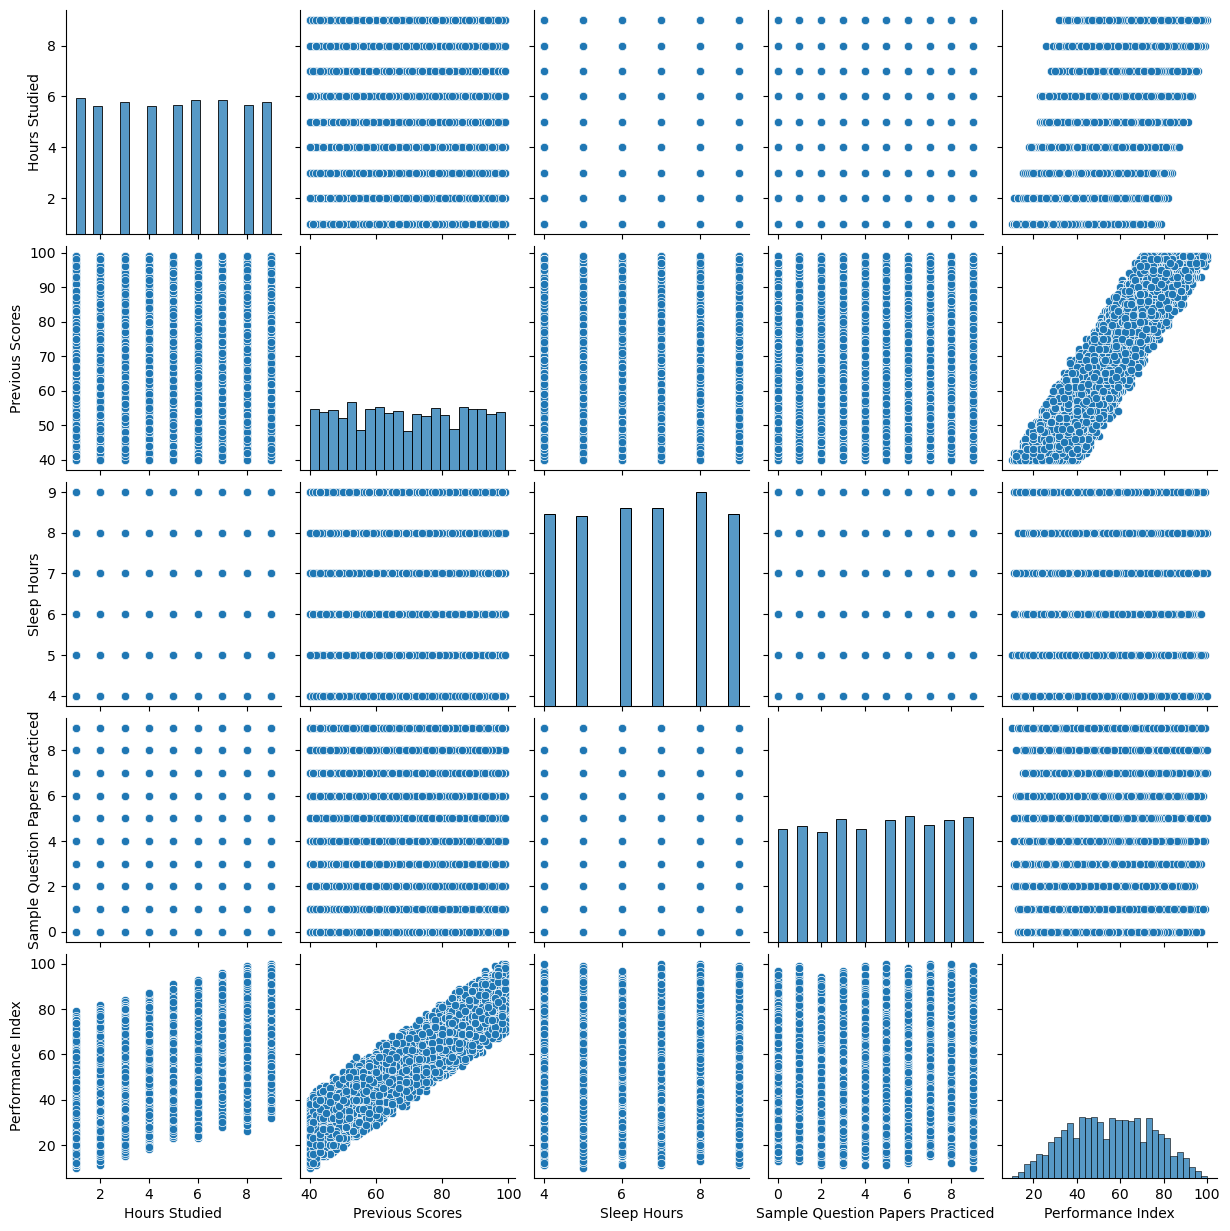

In [11]:
# lets visualize the dataset - numeric value and its correlation with other variables
sns.pairplot(students_data)

In [12]:
#correlation
students_data_copy=students_data.drop('Extracurricular Activities',axis=1)
students_data_copy.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


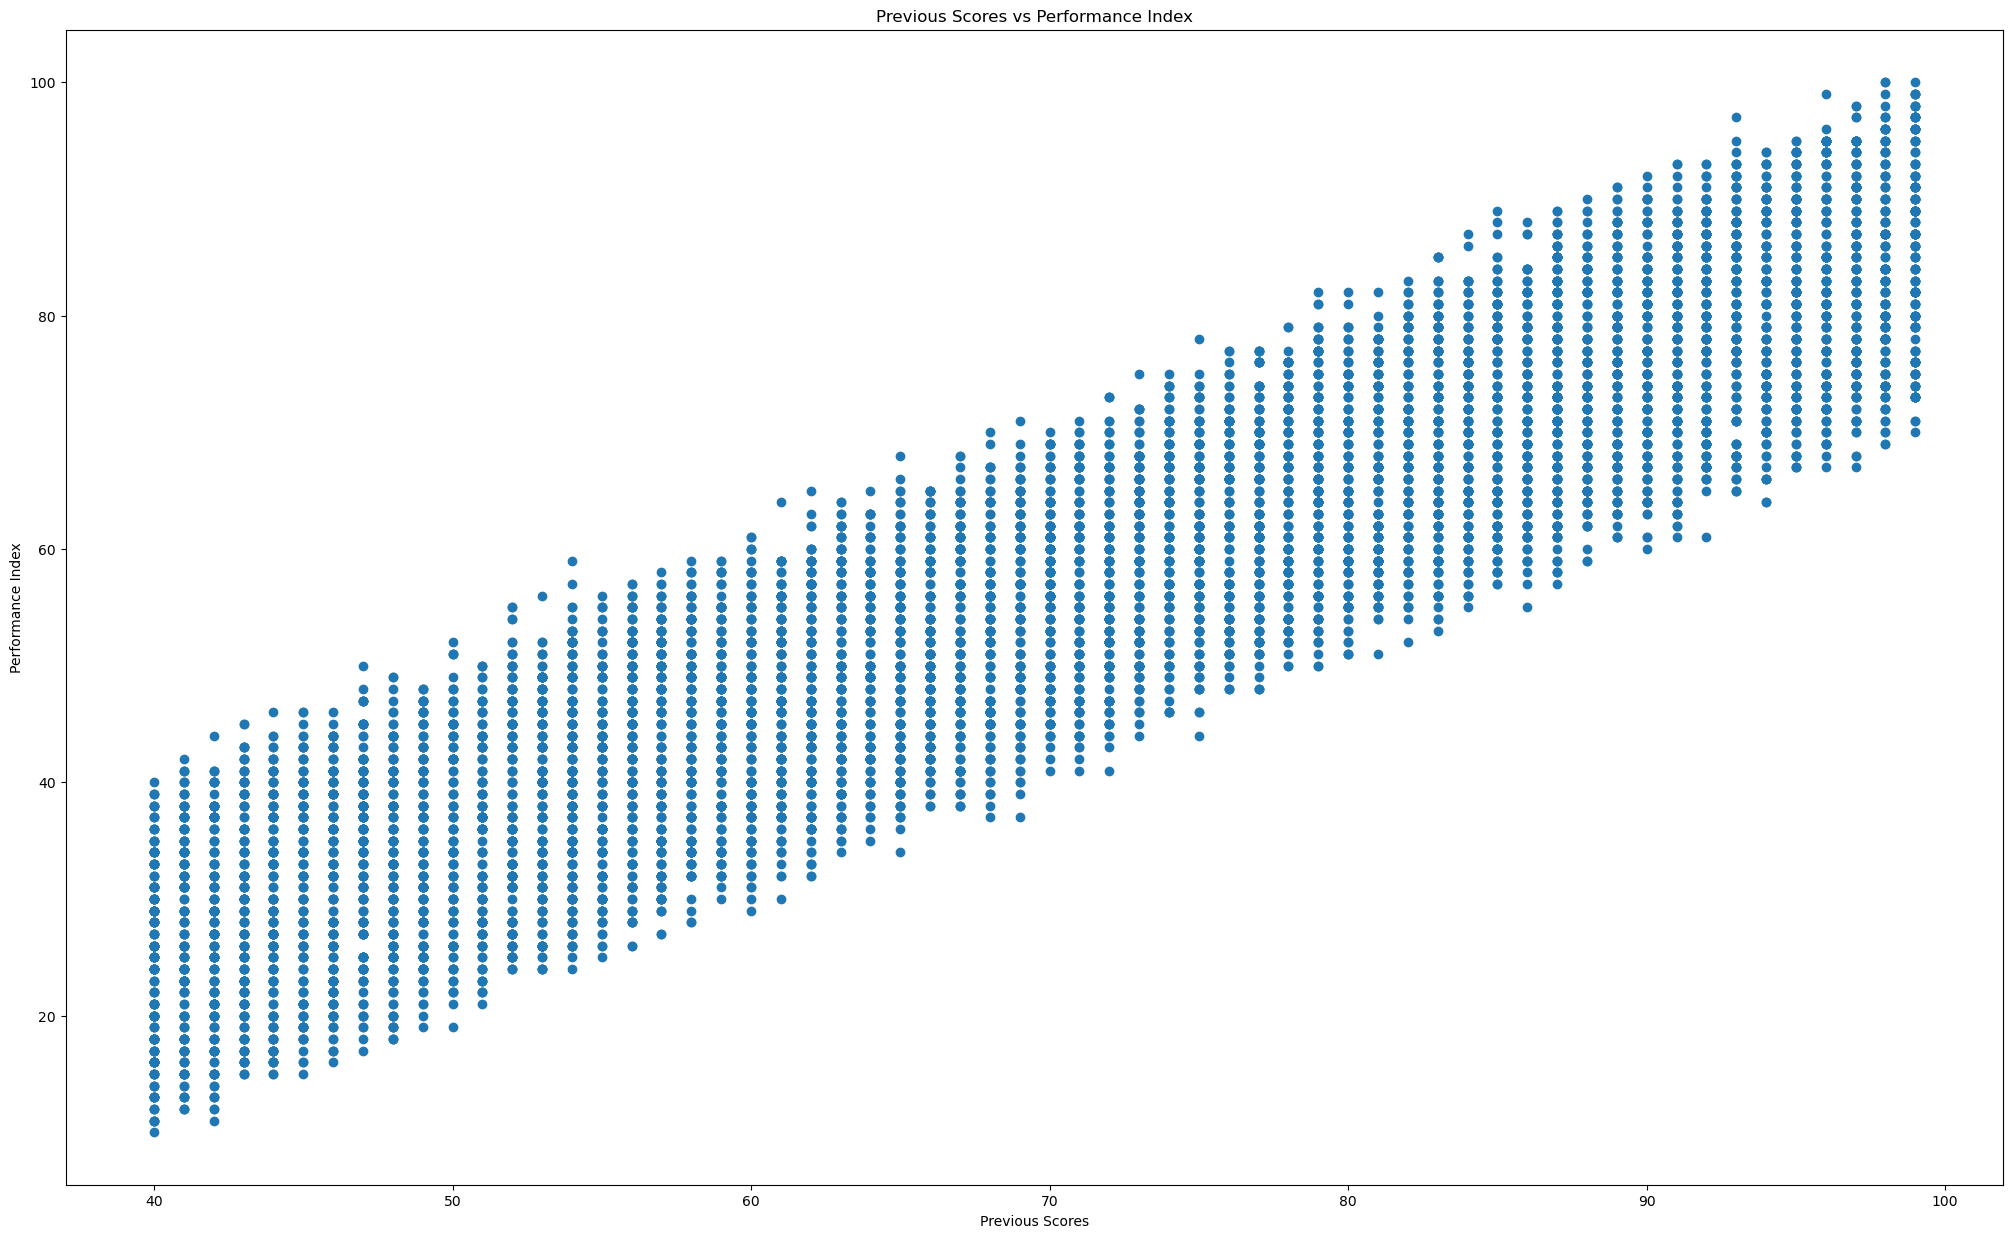

In [13]:
plt.figure(figsize=(25,15))
plt.scatter(students_data_copy['Previous Scores'],students_data_copy['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs Performance Index')
plt.show()

<Axes: >

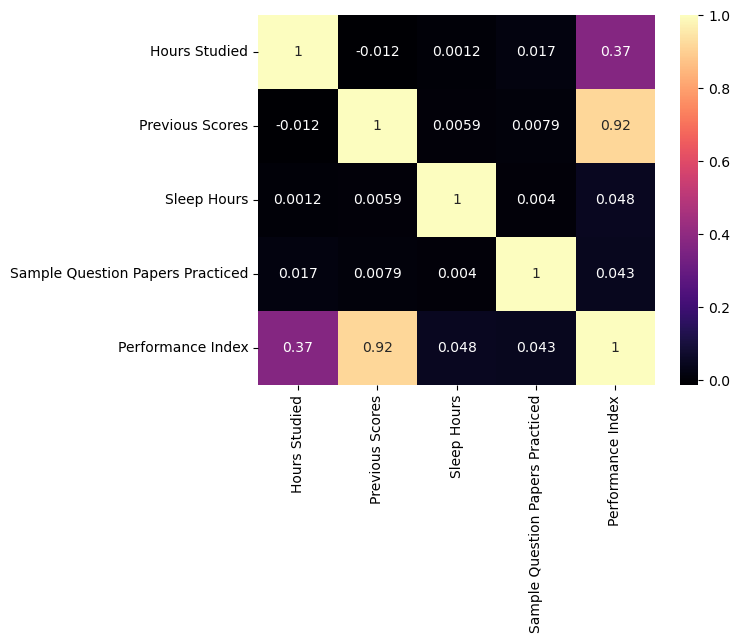

In [14]:
# correlation plot
sns.heatmap(students_data_copy.corr(),annot=True,cmap='magma')

In [15]:
# feature selection 
#feature=all the columns except the performance index
#target=performance index
x=students_data.iloc[:,:5]
y=students_data.iloc[:,-1]

In [16]:
# train test split - to prevent dataleakage 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
# Encoding categorical values of Extracurricular Activities
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
x_train['Extracurricular Activities']=enc.fit_transform(x_train['Extracurricular Activities'])
x_test['Extracurricular Activities']=enc.transform(x_test['Extracurricular Activities'])

In [18]:
x_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4901,5,49,0,5,5
4375,7,88,1,4,9
6698,3,94,1,7,1
9805,9,54,1,5,9
1101,4,56,1,8,6
...,...,...,...,...,...
5734,8,50,1,6,6
5191,4,68,0,9,3
5390,9,48,0,7,6
860,1,47,0,9,0


In [19]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
4862,6,94,0,6,4
7025,2,56,0,6,2
7647,5,81,0,8,8
7161,4,72,0,5,3


In [20]:
# multiple regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model=LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
len(y_test)

2500

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(pred,y_test)
score=r2_score(pred,y_test)
print('mean squared error :',mse)
print('mean absolute error:',mae)
print('root mean square error:',np.sqrt(mse))
print('r2_score:',score)
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))

mean squared error : 4.032544215419112
mean absolute error: 1.59757920916461
root mean square error: 2.008119571992443
r2_score: 0.9887870947969083
Cross-validation scores: [0.98819265 0.98884594 0.98848896 0.98859948 0.98895372]
Mean cross-validation score: 0.9886161528530895


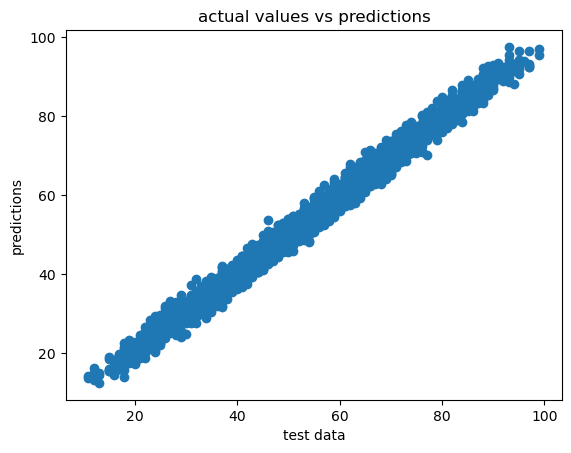

In [26]:
#1.assumptions after prediction - model evaluation
plt.scatter(y_test,pred)
plt.xlabel('test data')
plt.ylabel('predictions')
plt.title('actual values vs predictions')
plt.show()

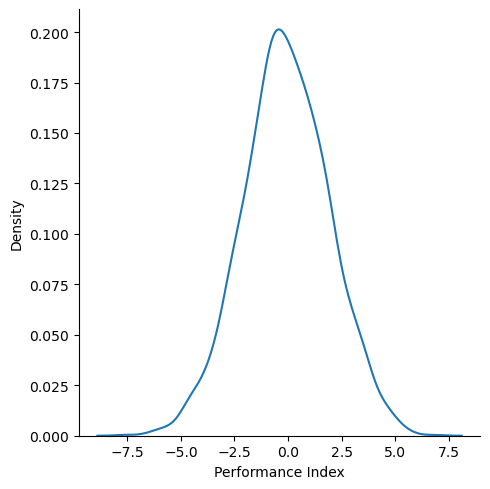

In [27]:
#2
#residual(error)= actual value - predicted value
residual=y_test-pred
sns.displot(residual,kind='kde')

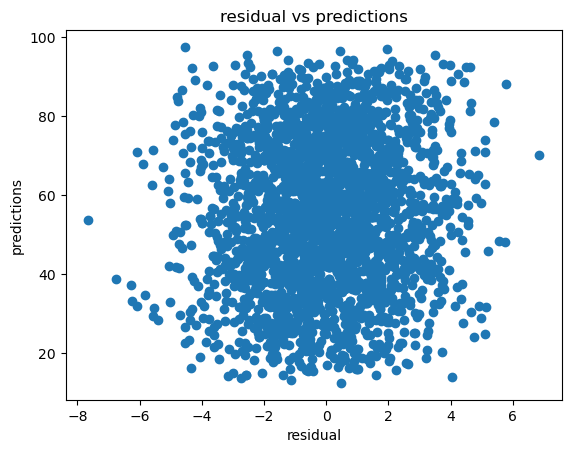

In [28]:
plt.scatter(residual,pred)
plt.xlabel('residual')
plt.ylabel('predictions')
plt.title('residual vs predictions')
plt.show()